# Table on Content
    1. Importing Libraries & dataset 'listing long'
    2. Dataset Exploration
      2.1 Delete unnecessary columns
      2.2 Descriptive Analysis
        2.2.1 Maximum_nights: Outliers Analysis
    3. Data Wrangling 
      3.1 Mixed Data Type
      3.2 Change Data Types
    4. Consistency Checks: Missing Values and Duplicates
      4.1 Missing Values
        4.1.1 Missing Values: review_scores_rating - Mean
        4.1.2 Missing Values: review_scores_accuracy - Mean
        4.1.3 Missing Values: review_scores_cleanliness - Mean
        4.1.4 Missing Values: review_scores_communication - Mean
        4.1.5 Missing Values: review_scores_location - Mean
        4.1.6 Missing Values: review_scores_value - Mean
      4.2 Duplicates: Drop
    5. Export final dataset

# 1. Importing Libraries & dataset 'listing short'

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'/Users/Dulce/Dec2024 - Airbnb Berlin'

In [3]:
# Import 'listing long'
listing_long = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'listings_long.csv'))

/var/folders/bq/9pw947f52fdd4s0pghmqxh580000gn/T/ipykernel_2835/4119695928.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  listing_long = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'listings_long.csv'))


In [4]:
listing_long.reset_index(drop=True, inplace=True)
listing_long.index = range(1, len(listing_long) + 1)

# 2. Dataset Exploration

In [5]:
listing_long.shape

(13327, 75)

In [6]:
listing_long.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,3176,https://www.airbnb.com/rooms/3176,20231218233220,2023-12-19,previous scrape,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,NaN,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,...,4.69,4.92,4.62,No,f,1,1,0,0,0.84
2,9991,https://www.airbnb.com/rooms/9991,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,NaN,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,...,5.00,4.86,4.86,Yes,f,1,1,0,0,0.07
3,183988,https://www.airbnb.com/rooms/183988,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/1041e6fd-c369...,882801,...,4.79,4.72,4.62,Yes,f,1,1,0,0,3.92
4,14325,https://www.airbnb.com/rooms/14325,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,NaN,NaN,https://a0.muscache.com/pictures/508703/24988a...,55531,...,4.85,4.60,4.45,No,f,4,4,0,0,0.16
5,186663,https://www.airbnb.com/rooms/186663,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★4.40 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/1757562/947b4...,897302,...,4.73,4.87,4.00,No,f,4,4,0,0,0.11


In [7]:
listing_long.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
13323,1048290130755102956,https://www.airbnb.com/rooms/1048290130755102956,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,168840227,...,NaN,NaN,NaN,No,f,1,1,0,0,NaN
13324,1048444986736672883,https://www.airbnb.com/rooms/1048444986736672883,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,NaN,"Alexanderplatz, Prenzlauer Berg, Boxhagener Pl...",https://a0.muscache.com/pictures/hosting/Hosti...,551079357,...,NaN,NaN,NaN,No,f,1,1,0,0,NaN
13325,1048535169043506669,https://www.airbnb.com/rooms/1048535169043506669,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,551034226,...,NaN,NaN,NaN,No,f,1,1,0,0,NaN
13326,1048637262243761764,https://www.airbnb.com/rooms/1048637262243761764,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★New · 3 bedrooms · 3 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,29385449,...,NaN,NaN,NaN,Yes,f,3,1,2,0,NaN
13327,1049081468356551619,https://www.airbnb.com/rooms/1049081468356551619,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★New · Studio · 2 beds...,NaN,Die Wohnung befindet sich im belebten Friedric...,https://a0.muscache.com/pictures/prohost-api/H...,175463482,...,NaN,NaN,NaN,Yes,t,9,9,0,0,NaN


In [8]:
listing_long.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
listing_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13327 entries, 1 to 13327
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13327 non-null  object 
 1   listing_url                                   13327 non-null  object 
 2   scrape_id                                     13327 non-null  int64  
 3   last_scraped                                  13327 non-null  object 
 4   source                                        13327 non-null  object 
 5   name                                          13327 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         6867 non-null   object 
 8   picture_url                                   13327 non-null  object 
 9   host_id                                       13327 non-null 

## 2.1 Delete unnecessary columns to reduce volume

In [10]:
columns_to_drop = ['amenities', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped', 'calendar_updated', 'description', 'has_availability', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id', 'host_identity_verified', 'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_since', 'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'last_review', 'last_scraped', 'latitude', 'license', 'longitude', 'maximum_maximum_nights', 'maximum_minimum_nights', 'maximum_nights_avg_ntm', 'minimum_maximum_nights', 'minimum_minimum_nights', 'minimum_nights', 'minimum_nights_avg_ntm', 'name', 'neighborhood_overview', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'number_of_reviews', 'number_of_reviews_l30d', 'number_of_reviews_ltm', 'picture_url', 'price', 'reviews_per_month', 'room_type', 'source', 'scrape_id', 'listing_url']
listing_long_reduced = listing_long.drop(columns=columns_to_drop)
listing_long_reduced.shape

(13327, 16)

In [11]:
listing_long_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13327 entries, 1 to 13327
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           13327 non-null  object 
 1   host_response_time           8275 non-null   object 
 2   host_response_rate           8275 non-null   object 
 3   host_is_superhost            13285 non-null  object 
 4   property_type                13327 non-null  object 
 5   accommodates                 13327 non-null  int64  
 6   maximum_nights               13327 non-null  int64  
 7   first_review                 10327 non-null  object 
 8   review_scores_rating         10332 non-null  float64
 9   review_scores_accuracy       10329 non-null  float64
 10  review_scores_cleanliness    10331 non-null  float64
 11  review_scores_checkin        10328 non-null  float64
 12  review_scores_communication  10331 non-null  float64
 13  review_scores_lo

## 2.2 Descriptive Analysis

In [12]:
listing_long_reduced.describe()

,accommodates,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,13327.000000,13327.000000,10332.000000,10329.000000,10331.000000,10328.000000,10331.000000,10328.000000,10326.000000
mean,2.934794,620.284235,4.738167,4.784869,4.675088,4.814052,4.814176,4.752748,4.633318
std,1.864588,488.014129,0.392293,0.380341,0.461500,0.371995,0.389549,0.361336,0.432601
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,120.000000,4.650000,4.730000,4.570000,4.780000,4.780000,4.670000,4.500000
50%,2.000000,365.000000,4.850000,4.890000,4.810000,4.920000,4.930000,4.850000,4.730000
75%,4.000000,1125.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.890000
max,16.000000,9999.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### 2.2.1 Maximum_nights: Outliers Analysis

<Axes: xlabel='maximum_nights', ylabel='maximum_nights'>

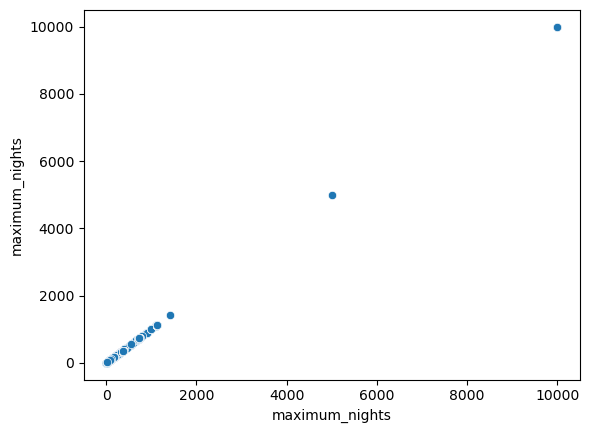

In [13]:
# Create scatterplot to analyze outliers
sns.scatterplot(x = 'maximum_nights', y = 'maximum_nights', data = listing_long_reduced)

In [14]:
# Set outlier criteria "maximum_nights > 365 = outlier" --> Bookings are based on the 365 days of the calendar 2024. It cannot be greater than a year.
listing_long_reduced.loc[listing_long_reduced['maximum_nights'] > 365]

,id,host_response_time,host_response_rate,host_is_superhost,property_type,accommodates,maximum_nights,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
4,14325,within a few hours,100%,f,Entire rental unit,1,1125,2010-06-29,4.68,5.00,4.85,4.70,4.85,4.60,4.45,f
5,186663,within a day,100%,f,Entire rental unit,2,730,2012-04-12,4.40,4.07,4.47,4.80,4.73,4.87,4.00,f
12,21869,NaN,NaN,f,Entire rental unit,2,730,2010-09-23,4.74,4.70,4.91,4.77,4.58,4.62,4.58,f
20,193601,NaN,NaN,f,Entire rental unit,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
25,195413,within a day,100%,f,Entire rental unit,4,730,2012-11-12,4.67,5.00,4.89,4.67,4.78,4.89,4.67,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13248,1044057605329253360,within an hour,100%,t,Entire rental unit,4,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
13303,1046220336894036720,within an hour,100%,f,Entire rental unit,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
13305,1046223860054622744,within an hour,100%,f,Entire rental unit,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
13306,1046224148012983761,within an hour,100%,f,Entire rental unit,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


Around the half of the listing have a maximum nights greater than 1 year. It seems to be a normal practice to show this listing is available in flexible terms. It is not an outlier. 

# 3. Data Wrangling

## 3.1 Mixed Data Type

In [15]:
for col in listing_long_reduced.columns.tolist():
  weird = (listing_long_reduced[[col]].map(type) != listing_long_reduced[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (listing_long_reduced[weird]) > 0:
    print (col)

id
host_response_time
host_response_rate
host_is_superhost
first_review


In [16]:
# Change host_response_time data type to string
listing_long_reduced['host_response_time'] = listing_long_reduced['host_response_time'].astype('str')
listing_long_reduced['host_response_time'].dtype

dtype('O')

In [17]:
# Change host_response_rate data type to string
listing_long_reduced['host_response_rate'] = listing_long_reduced['host_response_rate'].astype('str')
listing_long_reduced['host_response_rate'].dtype

dtype('O')

In [18]:
# Change host_is_superhost data type to string
listing_long_reduced['host_is_superhost'] = listing_long_reduced['host_is_superhost'].astype('str')
listing_long_reduced['host_is_superhost'].dtype

dtype('O')

In [19]:
# Change first_review data type to string
listing_long_reduced['first_review'] = listing_long_reduced['first_review'].astype('str')
listing_long_reduced['first_review'].dtype

dtype('O')

## 3.2 Change Data Types

In [20]:
# Change id data type to string
listing_long_reduced['id'] = listing_long_reduced['id'].astype('str')
listing_long_reduced['id'].dtype

dtype('O')

# 4. Consistency Checks: Duplicates and Missing Values

## 4.1 Missing Values

In [21]:
listing_long_reduced.isnull().sum()

id                                0
host_response_time                0
host_response_rate                0
host_is_superhost                 0
property_type                     0
accommodates                      0
maximum_nights                    0
first_review                      0
review_scores_rating           2995
review_scores_accuracy         2998
review_scores_cleanliness      2996
review_scores_checkin          2999
review_scores_communication    2996
review_scores_location         2999
review_scores_value            3001
instant_bookable                  0
dtype: int64

### 4.1.1 Missing Values: review_scores_rating - Mean

In [22]:
# Replace by Mean in order to avoid missing values in review_scores_rating
listing_long_reduced['review_scores_rating'].fillna(4.738112, inplace=True)

### 4.1.2 Missing Values: review_scores_accuracy - Mean

In [23]:
# Replace by Mean in order to avoid missing values in review_scores_accuracy
listing_long_reduced['review_scores_accuracy'].fillna(4.785194, inplace=True)

### 4.1.3 Missing Values: review_scores_cleanliness - Mean

In [24]:
# Replace by Mean in order to avoid missing values in review_scores_cleanliness
listing_long_reduced['review_scores_cleanliness'].fillna(4.675027, inplace=True)

### 4.1.5 Missing Values: review_scores_checkin - Mean

In [25]:
# Replace by Mean in order to avoid missing values in review_scores_checkin
listing_long_reduced['review_scores_checkin'].fillna(4.814016, inplace=True)

### 4.1.6 Missing Values: review_scores_communication - Mean

In [26]:
# Replace by Mean in order to avoid missing values in review_scores_communication
listing_long_reduced['review_scores_communication'].fillna(4.814183, inplace=True)

### 4.1.6 Missing Values: review_scores_location - Mean

In [27]:
# Replace by Mean in order to avoid missing values in review_scores_location
listing_long_reduced['review_scores_location'].fillna(4.752700, inplace=True)

### 4.1.6 Missing Values: review_scores_value - Mean

In [28]:
# Replace by Mean in order to avoid missing values in review_scores_value
listing_long_reduced['review_scores_value'].fillna(4.633318, inplace=True)

## 4.2 Duplicates

In [29]:
listing_long_reduced_dups = listing_long_reduced[listing_long_reduced.duplicated()]
listing_long_reduced_dups.shape

(0, 16)

In [30]:
# Dropping duplicates
listing_long_reduced_no_dups = listing_long_reduced.drop_duplicates()
listing_long_reduced_no_dups.shape

(13327, 16)

# 5. Export final dataset

In [31]:
listing_long_reduced_no_dups.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'listing_long_clean.pkl'))

In [ ]:
listing_long_reduced_no_dups.to_excel(os.path.join(path, '02 Data','Prepared Data', 'listing_long_clean.xlsx'))